In [1]:
import json
import pandas as pd
from pathlib import Path 
import plot_utils
import matplotlib.pyplot as plt
from matplotlib.ticker import EngFormatter
from importlib import reload
reload(plot_utils)

plot_utils.set_style()
colors = plot_utils.theme_colors

ftype = '.pdf'


In [2]:
def double_line_plot(x, y1, y2, label1=None, label2=None, color1='blue', color2='red', xlabel='time (s)', size=[1.5,1.5]):
    
    labels = {
        'Starting material cost': 'Cost', 
        'Starting Material Cost': 'Cost',
        'Cumulative utility': 'Utility',
        'Number targets': 'Targets',
        'Number of targets': 'Targets',
        'Number starting materials': 'Starting materials',
        'Cost starting materials': 'Cost',
        'Number of reaction steps': 'Steps',	
        'Average reaction score': 'Score',
    }
    
    fig, ax1 = plt.subplots()

    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(label1, color=color1)
    
    line1, = ax1.plot(x, y1, color=color1, marker='o', markersize=4)  # Added marker
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.grid(linewidth=0.5)
    ax1.set_ylim([ax1.get_ylim()[0] - 0.1*(ax1.get_ylim()[1]-ax1.get_ylim()[0]), 1.3*ax1.get_ylim()[1]])

    ax2 = ax1.twinx()  
    ax2.set_ylabel(label2, color=color2)  
    line2, = ax2.plot(x, y2, color=color2, marker='v', markersize=4)  # Added marker
    ax2.tick_params(axis='y', labelcolor=color2)
    ax2.set_ylim([ax2.get_ylim()[0] - 0.1*(ax2.get_ylim()[1]-ax2.get_ylim()[0]), ax2.get_ylim()[1]+0.1])


    fig.tight_layout() 
    plot_utils.set_size(size[0], size[1], ax=ax1) 
    plot_utils.set_size(size[0], size[1],ax=ax2)
    
    # Added legend
    ax2.legend([line1, line2], [labels[label1], labels[label2]], loc='lower right', frameon=False)
    plot_utils.set_size(size[0], size[1], ax=ax1) 
    plot_utils.set_size(size[0], size[1],ax=ax2)
    return fig

In [3]:
def scatter_plot_2d(x, y, xlabel='', ylabel='', c=0, xlim=None, ylim=None, size=[1.5, 1.5]):
    fig, ax = plt.subplots(1,1)
    sc = plt.scatter(x, y, c=colors[c], s=35, edgecolor='k', linewidth=0.5)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    if xlim:
        ax.set_xlim(xlim)
    if ylim:
        ax.set_ylim(ylim)
    
    plot_utils.set_size(size[0], size[1], ax=ax)
    
    return ax, fig

## Garibsingh Case Study (#1)

In [4]:
save_dir = Path('figs_garibsingh')
save_dir.mkdir(exist_ok=True)

#### Vary $\lambda_1$

In [5]:
result_dir = Path('../results/garibsingh_rew_vary')
df = plot_utils.df_from_dir(result_dir)
plot_utils.df_to_latex(df, save_dir/'latex_table_reward.txt')
df_1 = df.sort_values('Utility Weight')
df_1


,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Utility Weight,Starting Material Weight,Reaction Weight
0,0,0.000000,0.000000,6.247765,0,0.0,0,NaN,2.0,1.0,1.0
1,1,0.071429,1.000000,6.247765,2,1.3,3,0.893510,5.0,1.0,1.0
3,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,8.0,1.0,1.0
4,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,12.5,1.0,1.0
5,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,15.0,1.0,1.0
6,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,1.0,1.0
7,9,0.642857,5.031006,6.247765,16,19.1,31,0.932145,30.0,1.0,1.0
8,11,0.785714,5.612849,6.247765,19,21.4,39,0.870510,50.0,1.0,1.0
9,12,0.857143,6.173743,6.247765,21,23.5,45,0.851221,60.0,1.0,1.0
10,13,0.928571,6.247765,6.247765,22,24.3,47,0.842310,70.0,1.0,1.0


#### Vary $\lambda_2$

In [6]:
result_dir = Path('../results/garibsingh_cost_vary')
df = plot_utils.df_from_dir(result_dir)
plot_utils.df_to_latex(df, save_dir/'latex_table_cost.txt')
df_2 = df.sort_values('Starting Material Weight')
df_2

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Utility Weight,Starting Material Weight,Reaction Weight
0,11,0.785714,5.612849,6.247765,197,14660.7,34,0.956869,20.0,0.00,1.0
1,10,0.714286,5.220391,6.247765,16,303.4,28,0.968424,20.0,0.01,1.0
2,10,0.714286,5.220391,6.247765,17,109.0,29,0.933329,20.0,0.02,1.0
3,10,0.714286,5.220391,6.247765,16,72.7,31,0.959973,20.0,0.05,1.0
4,10,0.714286,5.220391,6.247765,16,52.7,32,0.956907,20.0,0.10,1.0
5,10,0.714286,5.220391,6.247765,17,22.9,34,0.937469,20.0,0.20,1.0
6,9,0.642857,5.031006,6.247765,16,19.1,31,0.932145,20.0,0.35,1.0
7,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,0.70,1.0
8,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.30,1.0
9,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,2.00,1.0


In [7]:
def broken_y_plot(x, y, color='blue', xlabel='time (s)', ylabel='value', size=[1.2,1.2]):
    fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    fig.subplots_adjust(hspace=0.08)  # adjust space between axes

    # plot the same data on both axes
    ax1.scatter(x, y, color=colors[0], marker='o', s=22)  # Reduced marker size
    ax2.scatter(x, y, color=colors[0], marker='o', s=22)  # Reduced marker size

    # hide the spines between ax and ax2
    ax1.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)
    ax1.xaxis.tick_top()
    ax1.tick_params(labeltop=False)  # don't put tick labels at the top
    ax2.xaxis.tick_bottom()

    ax1.grid(linewidth=0.5)
    ax2.grid(linewidth=0.5)

    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=8,
                linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    # zoom-in / limit the view to different portions of the data
    ax1.set_ylim(1e4, 2e4)  # outliers only
    print(y[-2])
    ax2.set_ylim(0, 120)  # most of the data

    # Set y-axis labels to engineering notation
    ax1.yaxis.set_major_formatter(EngFormatter(sep=""))
    ax2.yaxis.set_major_formatter(EngFormatter(sep=""))
    ax2.set_xlabel('$\\lambda_2$')
    ax2.set_ylabel('Starting material cost')

    plot_utils.set_size(size[0], size[1], ax=ax1) 
    plot_utils.set_size(size[0], size[1],ax=ax2)

    return fig 


12.700000000000001


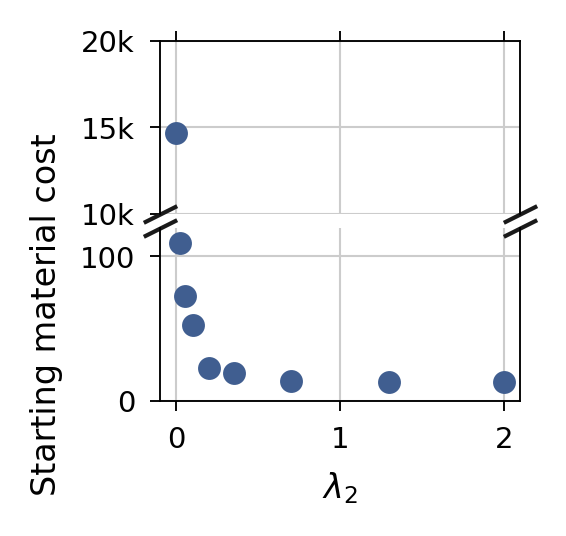

In [8]:
fig = broken_y_plot(x = list(df['Starting Material Weight']), y = list(df['Cost starting materials']), size=[1.2,1.2])
fig.savefig(save_dir/f'lam2_cost_rew{ftype}',bbox_inches='tight', dpi=200, transparent=True)

#### Vary $\lambda_3$

In [9]:
result_dir = Path('../results/garibsingh_rxn_vary')
df = plot_utils.df_from_dir(result_dir)
plot_utils.df_to_latex(df, save_dir/'latex_table_rxn.txt')
df_3 = df.sort_values('Reaction Weight')
df_3

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Utility Weight,Starting Material Weight,Reaction Weight
0,13,0.928571,6.247765,6.247765,19,15.0,72,0.720229,20.0,1.0,0.00
1,13,0.928571,6.247765,6.247765,18,18.7,48,0.786410,20.0,1.0,0.10
4,12,0.857143,6.173743,6.247765,20,21.3,48,0.847459,20.0,1.0,0.25
5,11,0.785714,5.612849,6.247765,18,19.2,42,0.864834,20.0,1.0,0.35
6,9,0.642857,4.926257,6.247765,15,14.4,33,0.922416,20.0,1.0,0.50
7,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,1.0,1.00
8,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.0,1.50
9,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.0,1.70
10,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,20.0,1.0,2.00
11,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,20.0,1.0,3.00


#### Pareto fronts 

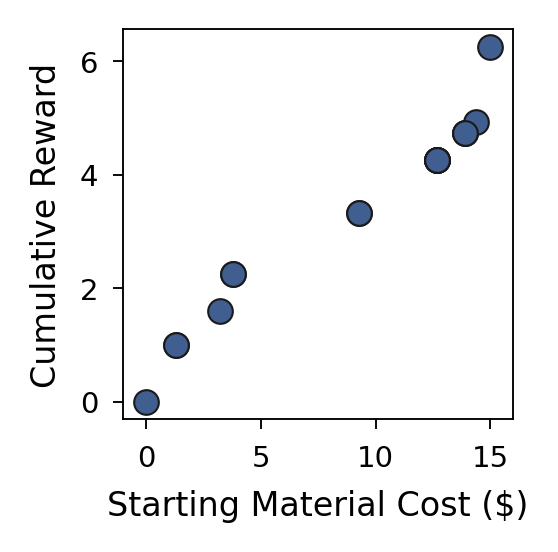

In [10]:
frames = [df_1, df_2, df_3]
df_all = pd.concat(frames)

ax, fig = scatter_plot_2d(df_all['Cost starting materials'], df_all['Total reward'], xlabel='Starting Material Cost ($)', ylabel='Cumulative Reward', c=0, xlim=[-1, 16], size=[1.3, 1.3])
fig.savefig(save_dir/f'pareto_1{ftype}',bbox_inches='tight', dpi=200, transparent=True)

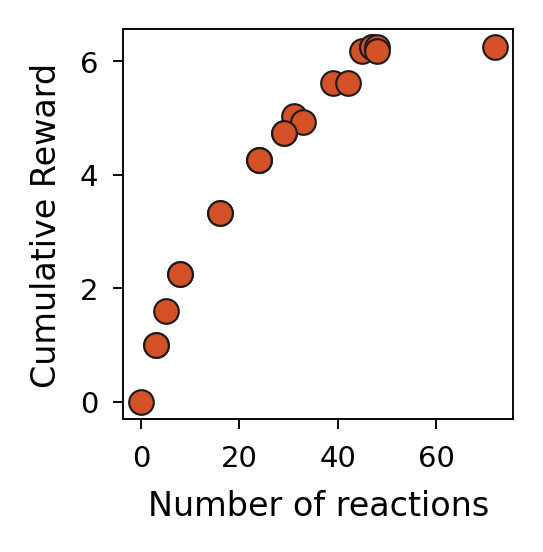

In [11]:
frames = [df_1, df_3]
df_all = pd.concat(frames)

ax, fig = scatter_plot_2d(df_all['Number reaction steps'], df_all['Total reward'], xlabel='Number of reactions', ylabel='Cumulative Reward', c=1, size=[1.3, 1.3])
fig.savefig(save_dir/f'pareto_2{ftype}',bbox_inches='tight', dpi=200, transparent=True)

In [12]:
df_all.sort_values('Total reward')

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Utility Weight,Starting Material Weight,Reaction Weight
0,0,0.000000,0.000000,6.247765,0,0.0,0,NaN,2.0,1.0,1.00
3,1,0.071429,1.000000,6.247765,2,1.3,3,0.893510,20.0,1.0,5.00
1,1,0.071429,1.000000,6.247765,2,1.3,3,0.893510,5.0,1.0,1.00
2,2,0.142857,1.601676,6.247765,4,3.2,5,0.911887,20.0,1.0,4.00
3,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,8.0,1.0,1.00
11,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,20.0,1.0,3.00
10,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,20.0,1.0,2.00
4,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,12.5,1.0,1.00
8,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,20.0,1.0,1.50
5,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,15.0,1.0,1.00


#### Ternary Plot

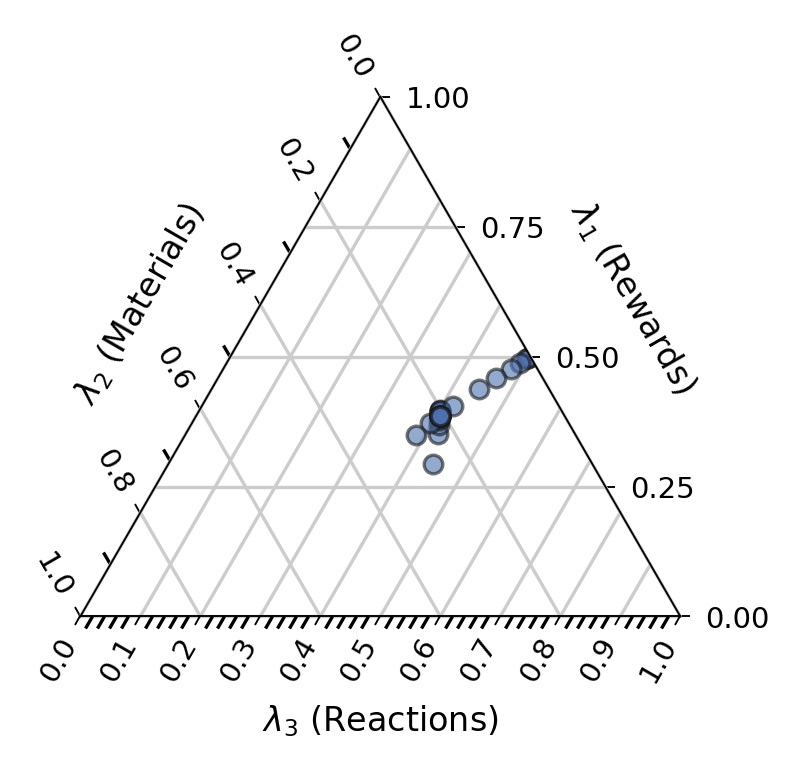

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator
import mpltern

frames = [df_1, df_2, df_3]
df_all = pd.concat(frames)

ax = plt.subplot(projection="ternary")
l1 = np.array(df_all['Utility Weight'])
l2 = np.array(df_all['Starting Material Weight'])
l3 = np.array(df_all['Starting Material Weight'])

l1 = np.divide(l1,(np.add(l1, l2, l3)) )
l2 = np.divide(l2,(np.add(l1, l2, l3)) )
l3 = np.divide(l3,(np.add(l1, l2, l3)) )

n_tars = df_all['Number targets']

ax.scatter(l1, l2, l3, s=20, edgecolors="k", alpha=0.6)
ax.set_tlim(0, 100)

ax.set_tlabel("$\\lambda_1$ (Rewards)")
ax.set_llabel("$\\lambda_2$ (Materials)")
ax.set_rlabel("$\\lambda_3$ (Reactions)")

ax.taxis.set_label_position("tick1")
ax.laxis.set_label_position("tick1")
ax.raxis.set_label_position("tick1")

ax.taxis.set_major_locator(MultipleLocator(0.25))
ax.laxis.set_major_locator(MultipleLocator(0.20))
ax.raxis.set_major_locator(MultipleLocator(0.10))

ax.laxis.set_minor_locator(MultipleLocator(0.1))
ax.raxis.set_minor_locator(AutoMinorLocator(5))

ax.grid(axis='t', which='major', linestyle='-')
ax.grid(axis='l', which='major', linestyle='-')
ax.grid(axis='r', which='major', linestyle='-')

plot_utils.set_size(2,2,ax=ax)
plt.show()




In [14]:
df_all

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Utility Weight,Starting Material Weight,Reaction Weight
0,0,0.000000,0.000000,6.247765,0,0.0,0,NaN,2.0,1.00,1.00
1,1,0.071429,1.000000,6.247765,2,1.3,3,0.893510,5.0,1.00,1.00
3,3,0.214286,2.239944,6.247765,5,3.8,8,0.913835,8.0,1.00,1.00
4,5,0.357143,3.315363,6.247765,8,9.3,16,0.963189,12.5,1.00,1.00
5,7,0.500000,4.257263,6.247765,12,12.7,24,0.953867,15.0,1.00,1.00
6,8,0.571429,4.736872,6.247765,14,13.9,29,0.934677,20.0,1.00,1.00
7,9,0.642857,5.031006,6.247765,16,19.1,31,0.932145,30.0,1.00,1.00
8,11,0.785714,5.612849,6.247765,19,21.4,39,0.870510,50.0,1.00,1.00
9,12,0.857143,6.173743,6.247765,21,23.5,45,0.851221,60.0,1.00,1.00
10,13,0.928571,6.247765,6.247765,22,24.3,47,0.842310,70.0,1.00,1.00


## AMD Case Study (#2)

In [15]:
save_dir = Path('figs_amd')
save_dir.mkdir(exist_ok=True)

In [16]:
df = plot_utils.df_from_dir(Path('../results/amd'))
df = df.sort_values('Utility Weight')
plot_utils.df_to_latex(df, save_dir/'latex_table.txt')
df.head()

,Number targets,Fraction targets,Total reward,Possible reward,Number starting materials,Cost starting materials,Number reaction steps,Average reaction score,Utility Weight,Starting Material Weight,Reaction Weight
2,0,0.000000,0.000000,90.769231,1,0.0,0,NaN,1.0,1.0,1.0
5,15,0.123967,9.846154,90.769231,13,13.1,10,0.975691,3.0,1.0,1.0
8,34,0.280992,24.000000,90.769231,28,43.6,30,0.953073,5.0,1.0,1.0
1,59,0.487603,39.461538,90.769231,49,97.4,68,0.891663,10.0,1.0,1.0
3,74,0.611570,52.769231,90.769231,62,147.2,99,0.803735,20.0,1.0,1.0


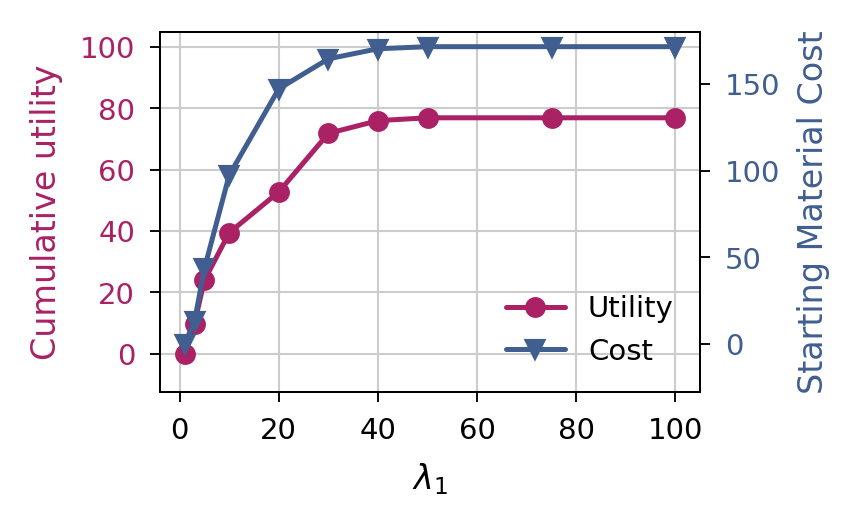

In [17]:
fig = double_line_plot(df['Utility Weight'], df['Total reward'], df['Cost starting materials'], 
                 label1='Cumulative utility', label2='Starting Material Cost', xlabel='$\\lambda_1$',
                 color1=colors[2], color2=colors[0], size=[1.8, 1.2])
fig.savefig(save_dir/f'reward_cost{ftype}',bbox_inches='tight', dpi=200, transparent=True)

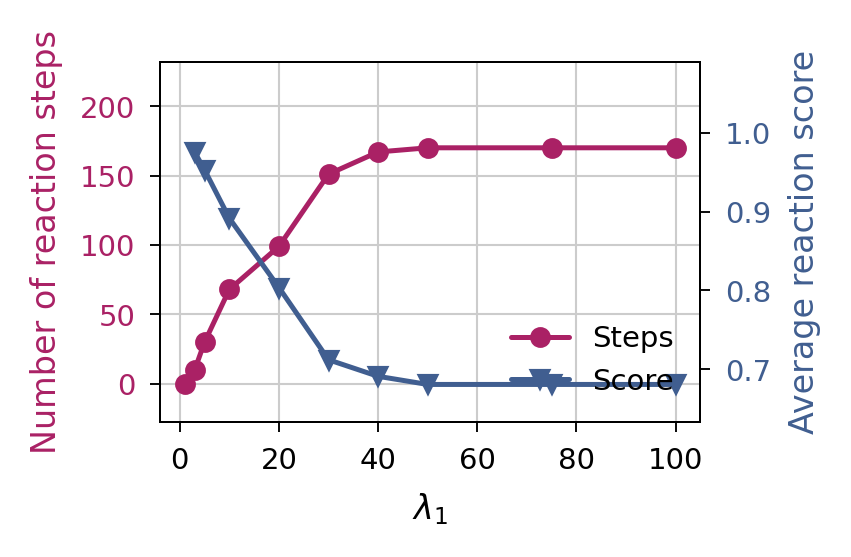

In [18]:
fig = double_line_plot(df['Utility Weight'], df['Number reaction steps'], df['Average reaction score'], 
                 label1='Number of reaction steps', label2='Average reaction score', xlabel='$\\lambda_1$',
                 color1=colors[2], color2=colors[0], size=[1.8,1.2])
fig.savefig(save_dir/f'reactions{ftype}',bbox_inches='tight', dpi=200, transparent=True)

100%|██████████| 15246/15246 [00:00<00:00, 28284.22it/s]


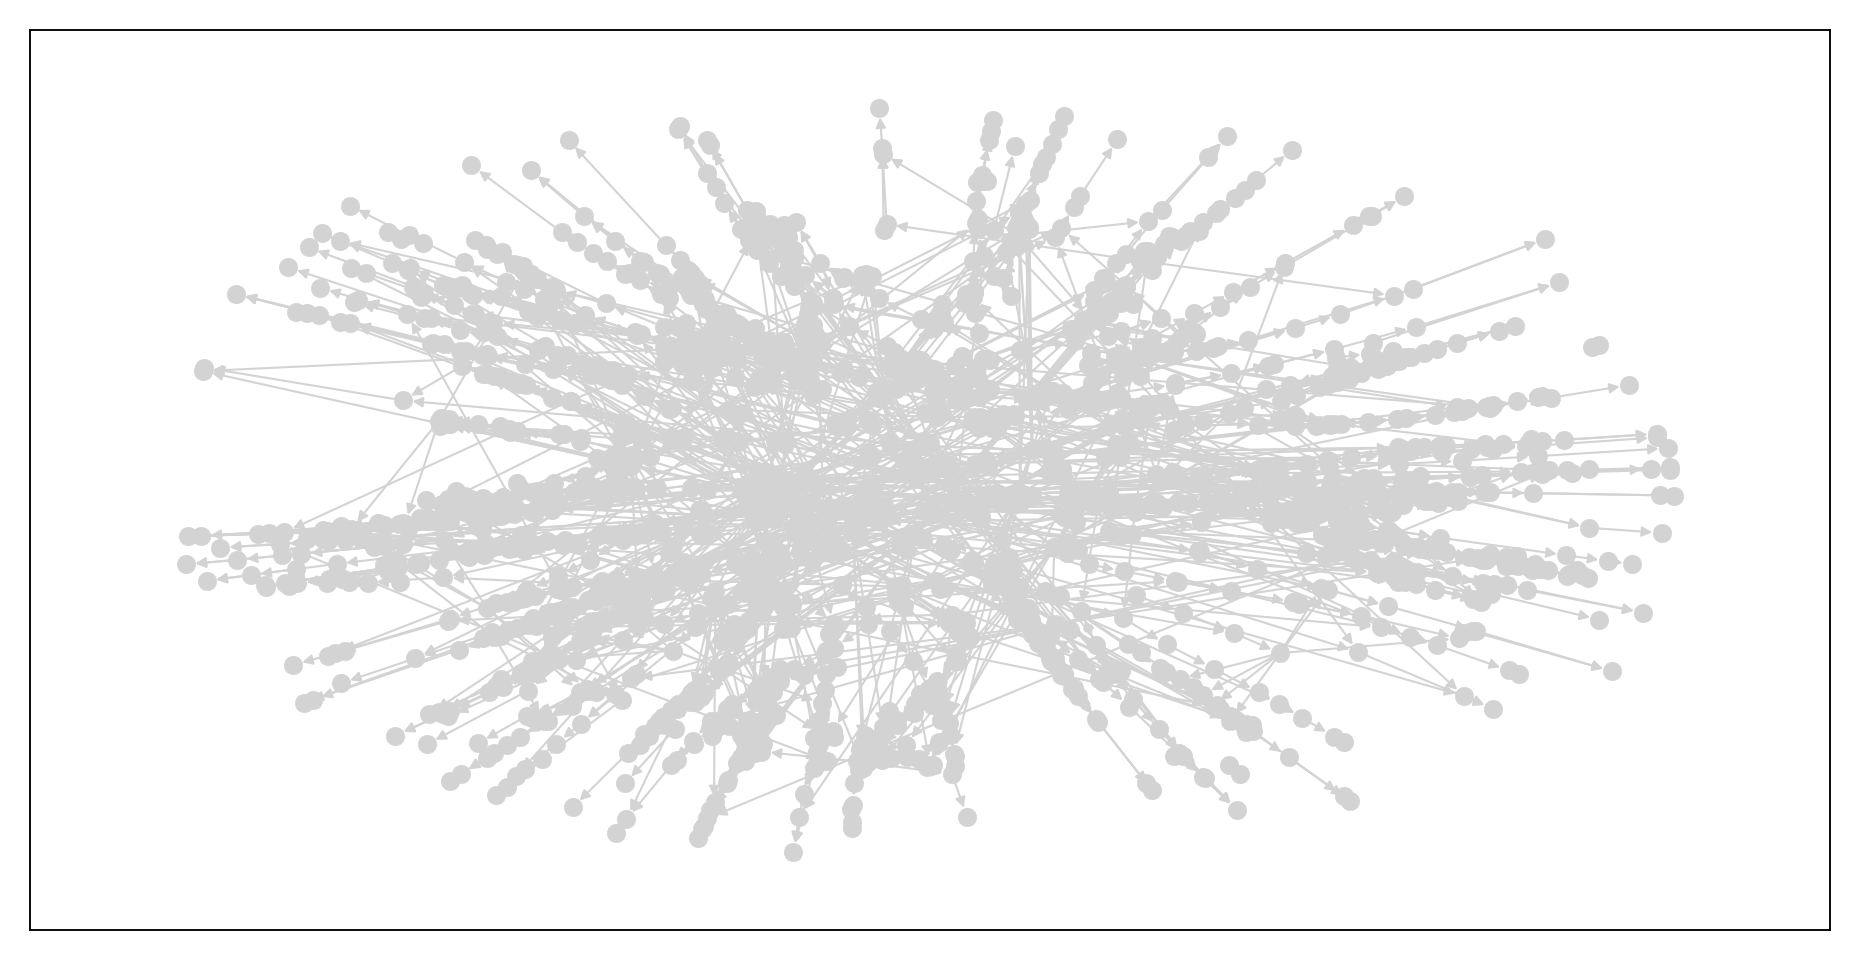

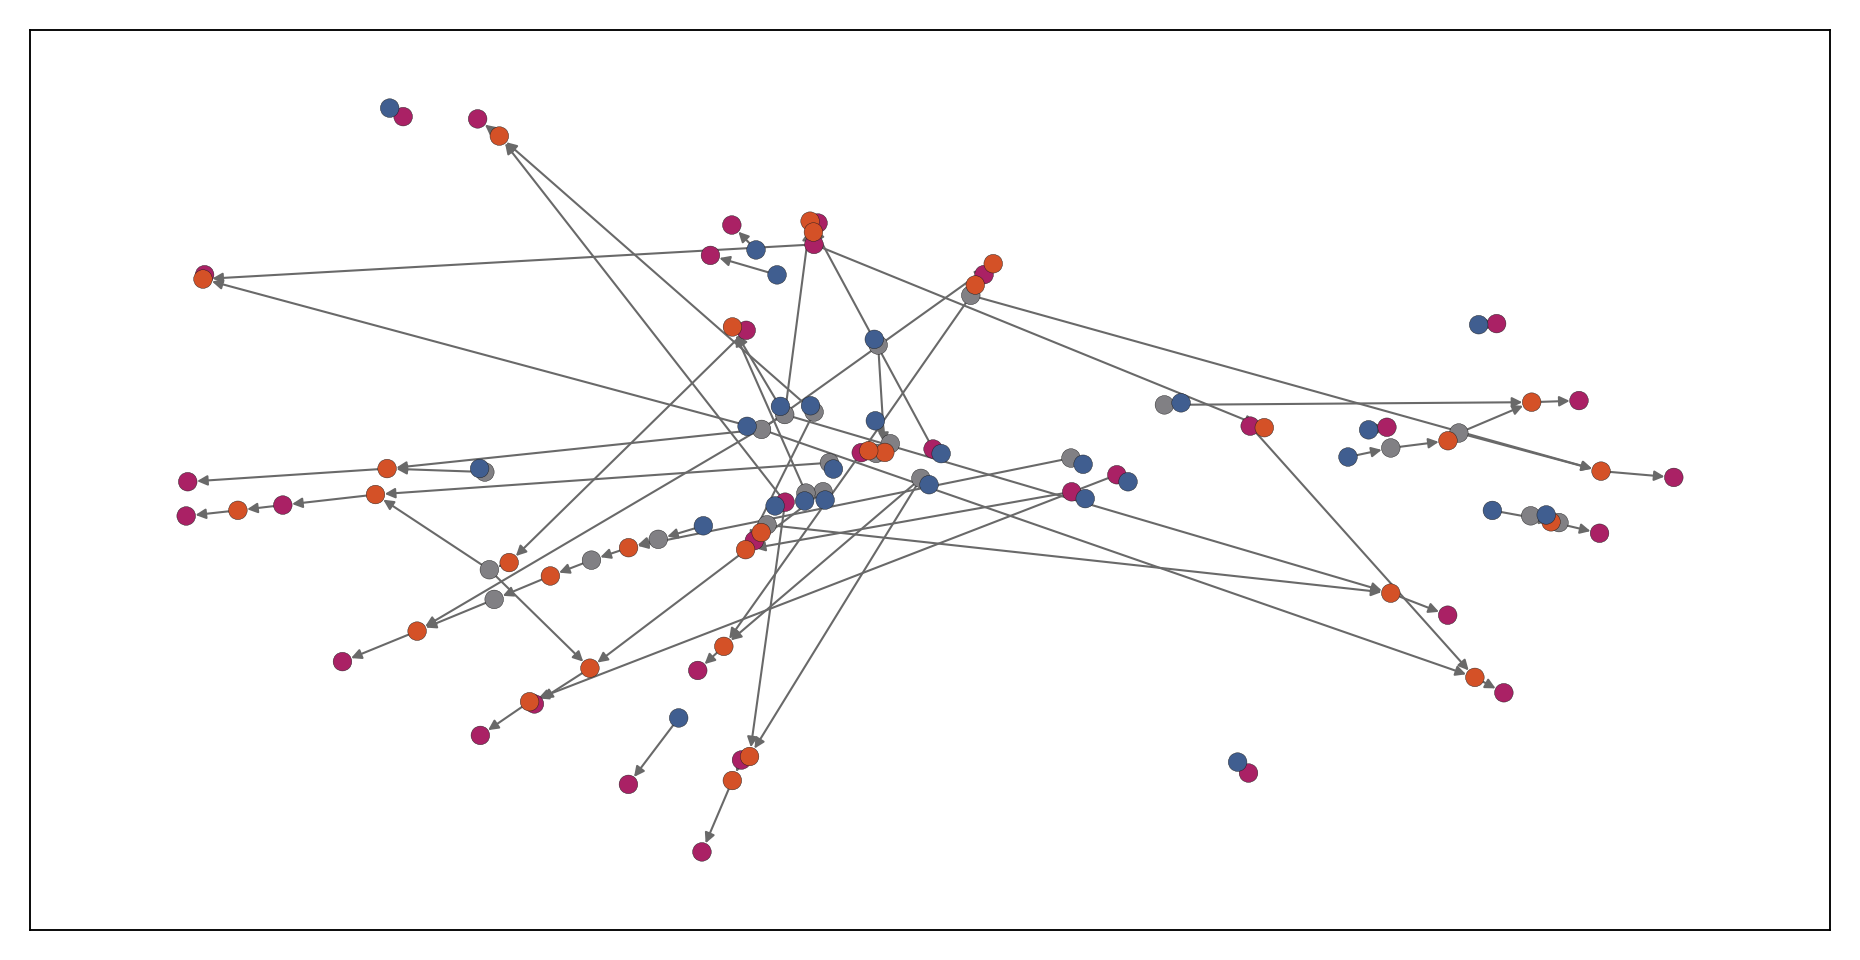

In [19]:
reload(plot_utils)
vis_results = Path('../results/amd/lam_5_1_1')
fig1, ax1, fig2, ax2 = plot_utils.graph_vis(
    tree_path=Path('../examples/amd/trees_w_info.json'),
    routes_path=Path(vis_results/'routes.json'),
    cleaned_tar_path=Path(vis_results/'cleaned_tar_dict.csv'),
    percent_plot=1
    )
plot_utils.set_size(6, 3, ax=ax1)
plot_utils.set_size(6, 3, ax=ax2)
fig1.savefig(save_dir/f'network_back{ftype}',bbox_inches='tight', dpi=1000, transparent=True)
fig2.savefig(save_dir/f'network_front{ftype}',bbox_inches='tight', dpi=1000, transparent=True)

## Button Case Study

In [20]:
df = plot_utils.df_from_dir(Path('../results/button_alectinib'))
df


""
